In [28]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [29]:
# Importing the ords_prods_merge dataframe
path = r'C:\Users\ztrim\06-2025 Instacart Basket Analysis'

In [30]:
path

'C:\\Users\\ztrim\\06-2025 Instacart Basket Analysis'

In [31]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge.pkl'))

In [32]:
ords_prods_merge.shape

(32404859, 21)

In [33]:
# Create a subset
df = ords_prods_merge[:1000000]

In [34]:
df.shape

(1000000, 21)

In [35]:
# Define a function 

def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return np.nan

In [36]:
# Apply the function 
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\ztrim\AppData\Local\Temp\ipykernel_21588\92101188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [37]:
df['price_range'].value_counts(dropna = False) 

price_range
Mid-range product    673183
Low-range product    314392
High range            12425
Name: count, dtype: int64

In [38]:
# Check the most expensive product wuthin the subset
df['prices'].max()

99999.0

In [39]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\ztrim\AppData\Local\Temp\ipykernel_21588\1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [40]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [41]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [42]:
df['price_range_loc'].value_counts(dropna = False) 

price_range_loc
Mid-range product     673183
Low-range product     314392
High-range product     12425
Name: count, dtype: int64

In [43]:
# Which day most orders take place. Print the frequency of the “orders_day_of_week” column
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [44]:
# Create a new column, “busiest day,” containing three different values: “Busiest day,” “Least busy,” and “Regularly busy.”
result = []

for value in ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [45]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy

In [46]:
ords_prods_merge['busiest_day'] = result

In [47]:
ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

In [48]:
# Create "Busiest days” (plural) and two slowest days column
result_2 = []

for value in ords_prods_merge["orders_day_of_week"]:
  if value == 0 or value == 1:
    result_2.append("Busiest day")
  elif value == 4 or value ==3:
    result_2.append("Least busy")
  else:
    result_2.append("Regularly busy")
      
ords_prods_merge ["busiest_days"] = result_2 

In [49]:
# Checking the values of this new column for accuracy
ords_prods_merge["busiest_days"].value_counts(dropna = False)

busiest_days
Regularly busy    12916111
Busiest day       11864412
Least busy         7624336
Name: count, dtype: int64

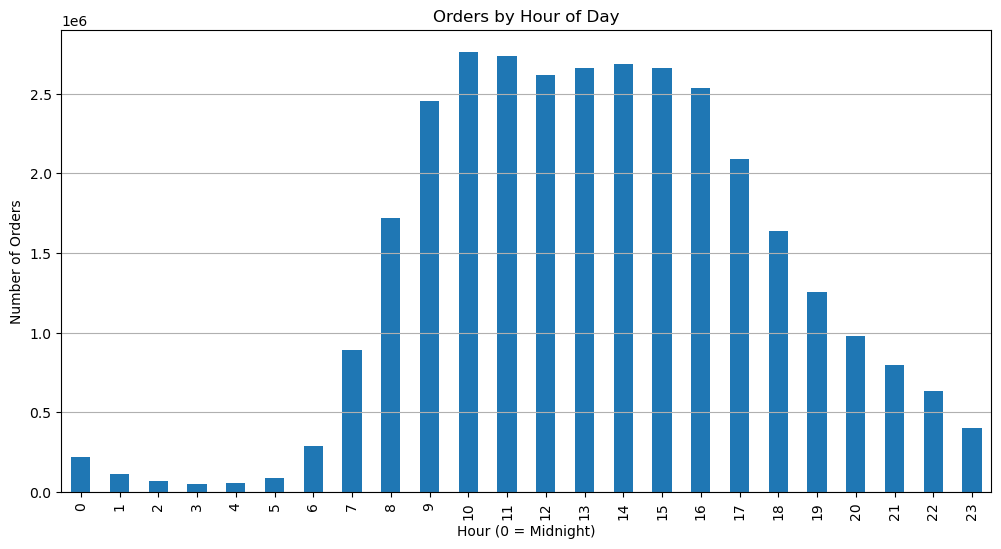

In [50]:
import matplotlib.pyplot as plt

ords_prods_merge['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Orders by Hour of Day')
plt.xlabel('Hour (0 = Midnight)')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.show()

In [51]:
# Create column “busiest_period_of_day” with “Most orders,” “Average orders,” & “Fewest orders” labels. 
result_3 = []

for value in ords_prods_merge["order_hour_of_day"]:
    if value in [10, 11, 12, 13, 14]:
        result_3.append("Most orders")
    elif value in [8, 9, 15, 16, 17]:
        result_3.append("Average orders")
    else:
        result_3.append("Fewest orders")

ords_prods_merge["busiest_period_of_day"] = result_3

In [52]:
# Print the frequency for "busiest_period_of_day" column
ords_prods_merge["busiest_period_of_day"].value_counts(dropna = False)

busiest_period_of_day
Most orders       13466522
Average orders    11457321
Fewest orders      7481016
Name: count, dtype: int64

In [53]:
# Export dataframe as ords_prods_merge 
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge.pkl'))